# Breast Cancer Wisconsin (Diagnostic) Data Set 


For this kernel, I will be exploring the Breast Cancer Wisconsin Data Set obtained through [Kaggle](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data), which is also available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29).

According to the repository, this data set contains features computed from digitized images of cells extracted by a fine needle aspirate of a breast mass.  Each feature is a characteristic measured from the cell nuclei of cell masses from 569 patients.  The overall goal of this analysis is to train a learning algorithm that will be able to accurately classify cells into malignant and benign classes.

There are 32 features in total within this dataset, with one of them being the target feature (diagnosis).  

**Variable descriptions: **
 * 1) ID number 
 * 2) Diagnosis (M = malignant, B = benign) 
 * 3) - 32) For each of the following characteristics, 3 measurements (**mean**, **se**, **worst**) were computed for each cell nuclei:

    * radius (mean of distances from center to points on the perimeter) 
    * texture (standard deviation of gray-scale values) 
    * perimeter 
    * area 
    * smoothness (local variation in radius lengths) 
    * compactness (perimeter^2 / area - 1.0) 
    * concavity (severity of concave portions of the contour) 
    * concave points (number of concave portions of the contour) 
    * symmetry 
    * fractal dimension ("coastline approximation" - 1)

    The **mean**, **standard error** and "**worst**" or largest (mean of the three largest values) of these features were computed, resulting in 30 additional features. 

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt 
%matplotlib inline

import os

### Explore Data

In [10]:
data = pd.read_csv('data.csv')
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [12]:
# Separate 'diagnosis' output and drop 'id', and 'Unnamed: 32' from input
data.drop(['id','Unnamed: 32'], axis = 1, inplace = True)

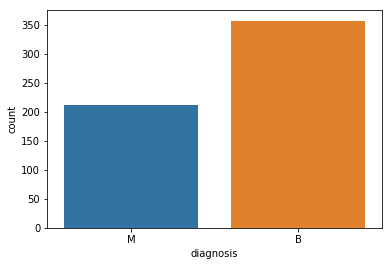

In [13]:
sns.countplot(data.diagnosis);

In [6]:
data.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean     ...       texture_worst  perimeter_worst  \
count     569.000000     ...          569.000000       569.000000   
mean        0.181162     ...           25.677223       107.261213   
std         0.027414     ...            6.146258        33.602542   
min         0.106000     ...           12.020000        50.410000   
25%         0.161900     ...           21.080000        84.110000   
50%         0.179200     ...           25.410000        97.660000   
75%         0.195700     ...           29.720000       125.400000   
max         0.304000     ...           49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

### Scale Data 

Here I scale the data using `StandardScaler()` which mean normalizes each feature to 0 and divides it by the SD. 

In [21]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
from sklearn.preprocessing import StandardScaler

feature_col = [col for col in data.columns if col != 'diagnosis']

# Standardize by removing mean and scaling by unit variance 
stdsc = StandardScaler()
data_sc = pd.DataFrame(stdsc.fit_transform(data[feature_col]), columns = feature_col)
data_sc.head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   fractal_dimension_mean           ...             radius_worst  \
0                2.255747           ...                 1.886690   
1               -0.868652           ...                 1.805927   
2               -0.398008           ...                 1.511870   
3                4.910919           ...                -0.281464   
4               -0.562450           ...                 1.298575   

   texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0      -1.359293         2.303601    2.001237          1.307686   
1      -0.369203         1.535126    1.890489         -0.375612   
2      -0.023974         1.347475    1.456285          0.527407   
3       0.133984        -0.249939   -0.550021          3.394275   
4      -1.466770         1.338539    1.220724          0.220556   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0           2.616665         2.109526              2.296076        2.750622   
1          -0.430444        -0.146749              1.087084       -0.243890   
2           1.082932         0.854974              1.955000        1.152255   
3           3.893397         1.989588              2.175786        6.046041   
4          -0.313395         0.613179              0.729259       -0.868353   

   fractal_dimension_worst  
0                 1.937015  
1                 0.281190  
2                 0.201391  
3                 4.935010  
4                -0.397100  

[5 rows x 30 columns]

Since three sets of measurements were acquired from the dataset (mean, SE, worst), I plotted each set separately for ease of visualization.

In [61]:
# Combine scaled data with diagnosis column
data_sc_all = pd.concat([data.diagnosis, data_sc], axis = 1)

# Mean, SE, and Worst column names 
mean_col = [col for col in data_sc_all.columns if 'mean' in col]
se_col = [col for col in data_sc_all.columns if 'se' in col]
worst_col = [col for col in data_sc_all.columns if 'worst' in col]

# Append diagnosis column to column names 
for col in [mean_col, se_col, worst_col]: 
    col.append('diagnosis')

# Melt data to be fed into violin plots 
data_m = data_sc_all[mean_col]
data_se = data_sc_all[se_col]
data_w = data_sc_all[worst_col]

data_m_melt = pd.melt(data_m, 
                      id_vars = 'diagnosis', 
                      var_name = 'features', 
                      value_name = 'value')

data_se_melt = pd.melt(data_se, 
                       id_vars = 'diagnosis', 
                       var_name = 'features', 
                       value_name = 'value')

data_w_melt = pd.melt(data_w, 
                      id_vars = 'diagnosis', 
                      var_name = 'features', 
                      value_name = 'value')

In [62]:
data_m_melt.head()

diagnosis     features     value
0         M  radius_mean  1.097064
1         M  radius_mean  1.829821
2         M  radius_mean  1.579888
3         M  radius_mean -0.768909
4         M  radius_mean  1.750297

### Visualize Data


#### Violin Plots
Here I visualize the data using a violin plot for each set (mean, se, worst) of features. A violin plot displays the distribution of values of each feature for the two different classifications.  How widely the peaks are separated for each feature can be an indicator of which features may be most predictive for classifying the data. 

In [63]:
data_all_melt = {'Mean': data_m_melt, 
                 'SE': data_se_melt, 
                 'Worst': data_w_melt}

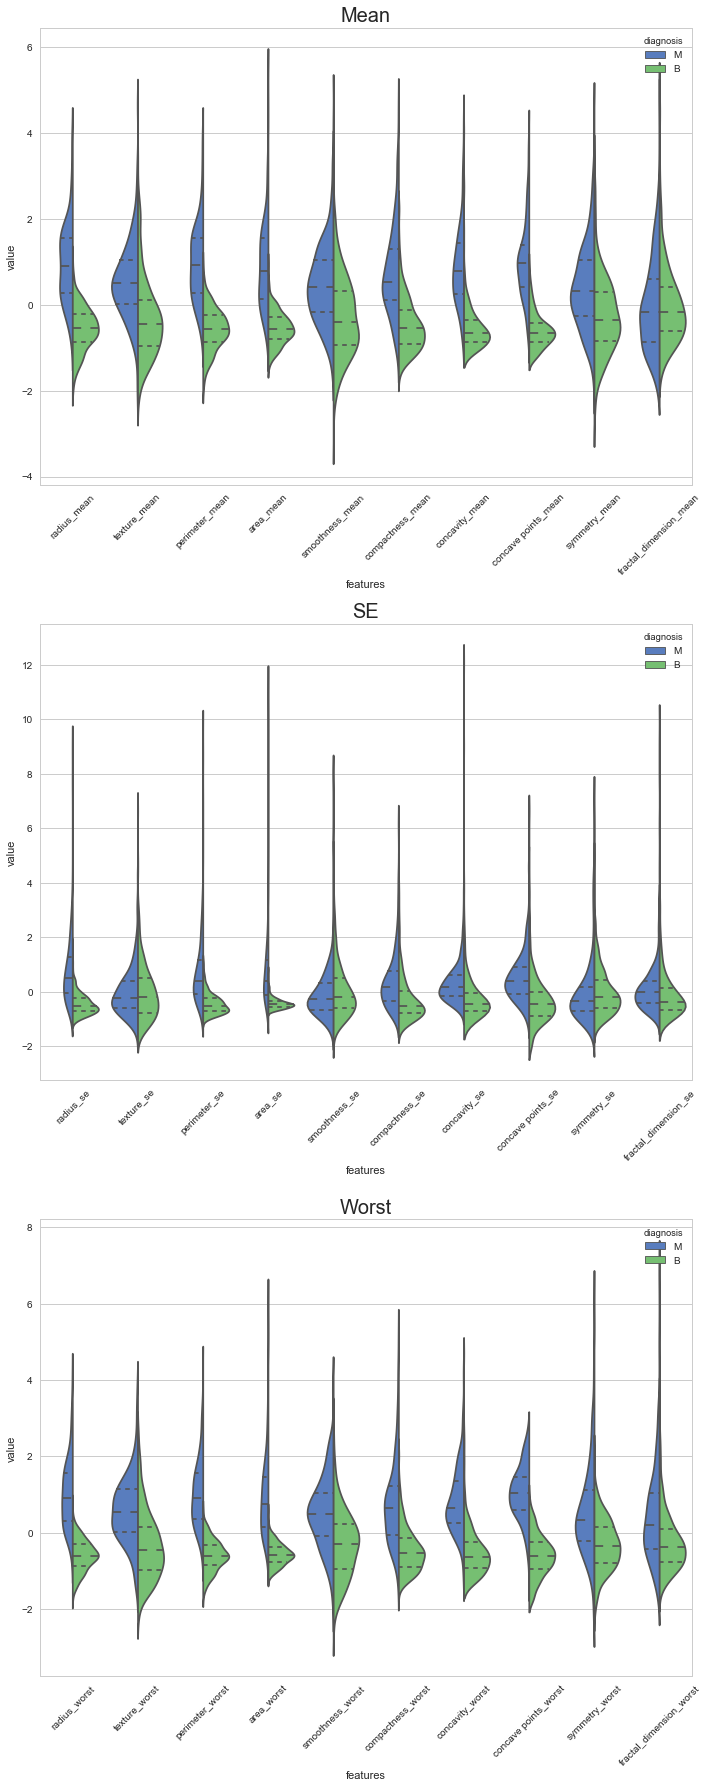

In [68]:
sns.set(style = 'whitegrid', palette = 'muted')
fig, axList = plt.subplots(nrows = 3, ncols = 1)
axList = axList.flatten()
fig.set_size_inches (10,25)
titles = list(data_all_melt.keys())

for ax in enumerate(axList): 
    loc = ax[0]
    ax = ax[1]
    
    sns.violinplot(x = 'features', 
                   y = 'value', 
                   hue = 'diagnosis', 
                   data = data_all_melt[titles[loc]], 
                   ax = ax, 
                   inner = 'quart',
                   split = True)
    
    plt.sca(ax)
    plt.xticks(rotation = 45)
    ax.set_title(str(titles[loc]), fontsize = 20)
    
    plt.tight_layout()

#### Pair Plot 

Next I plot some pair plots to see how pairs of features vary.  

#### Mean

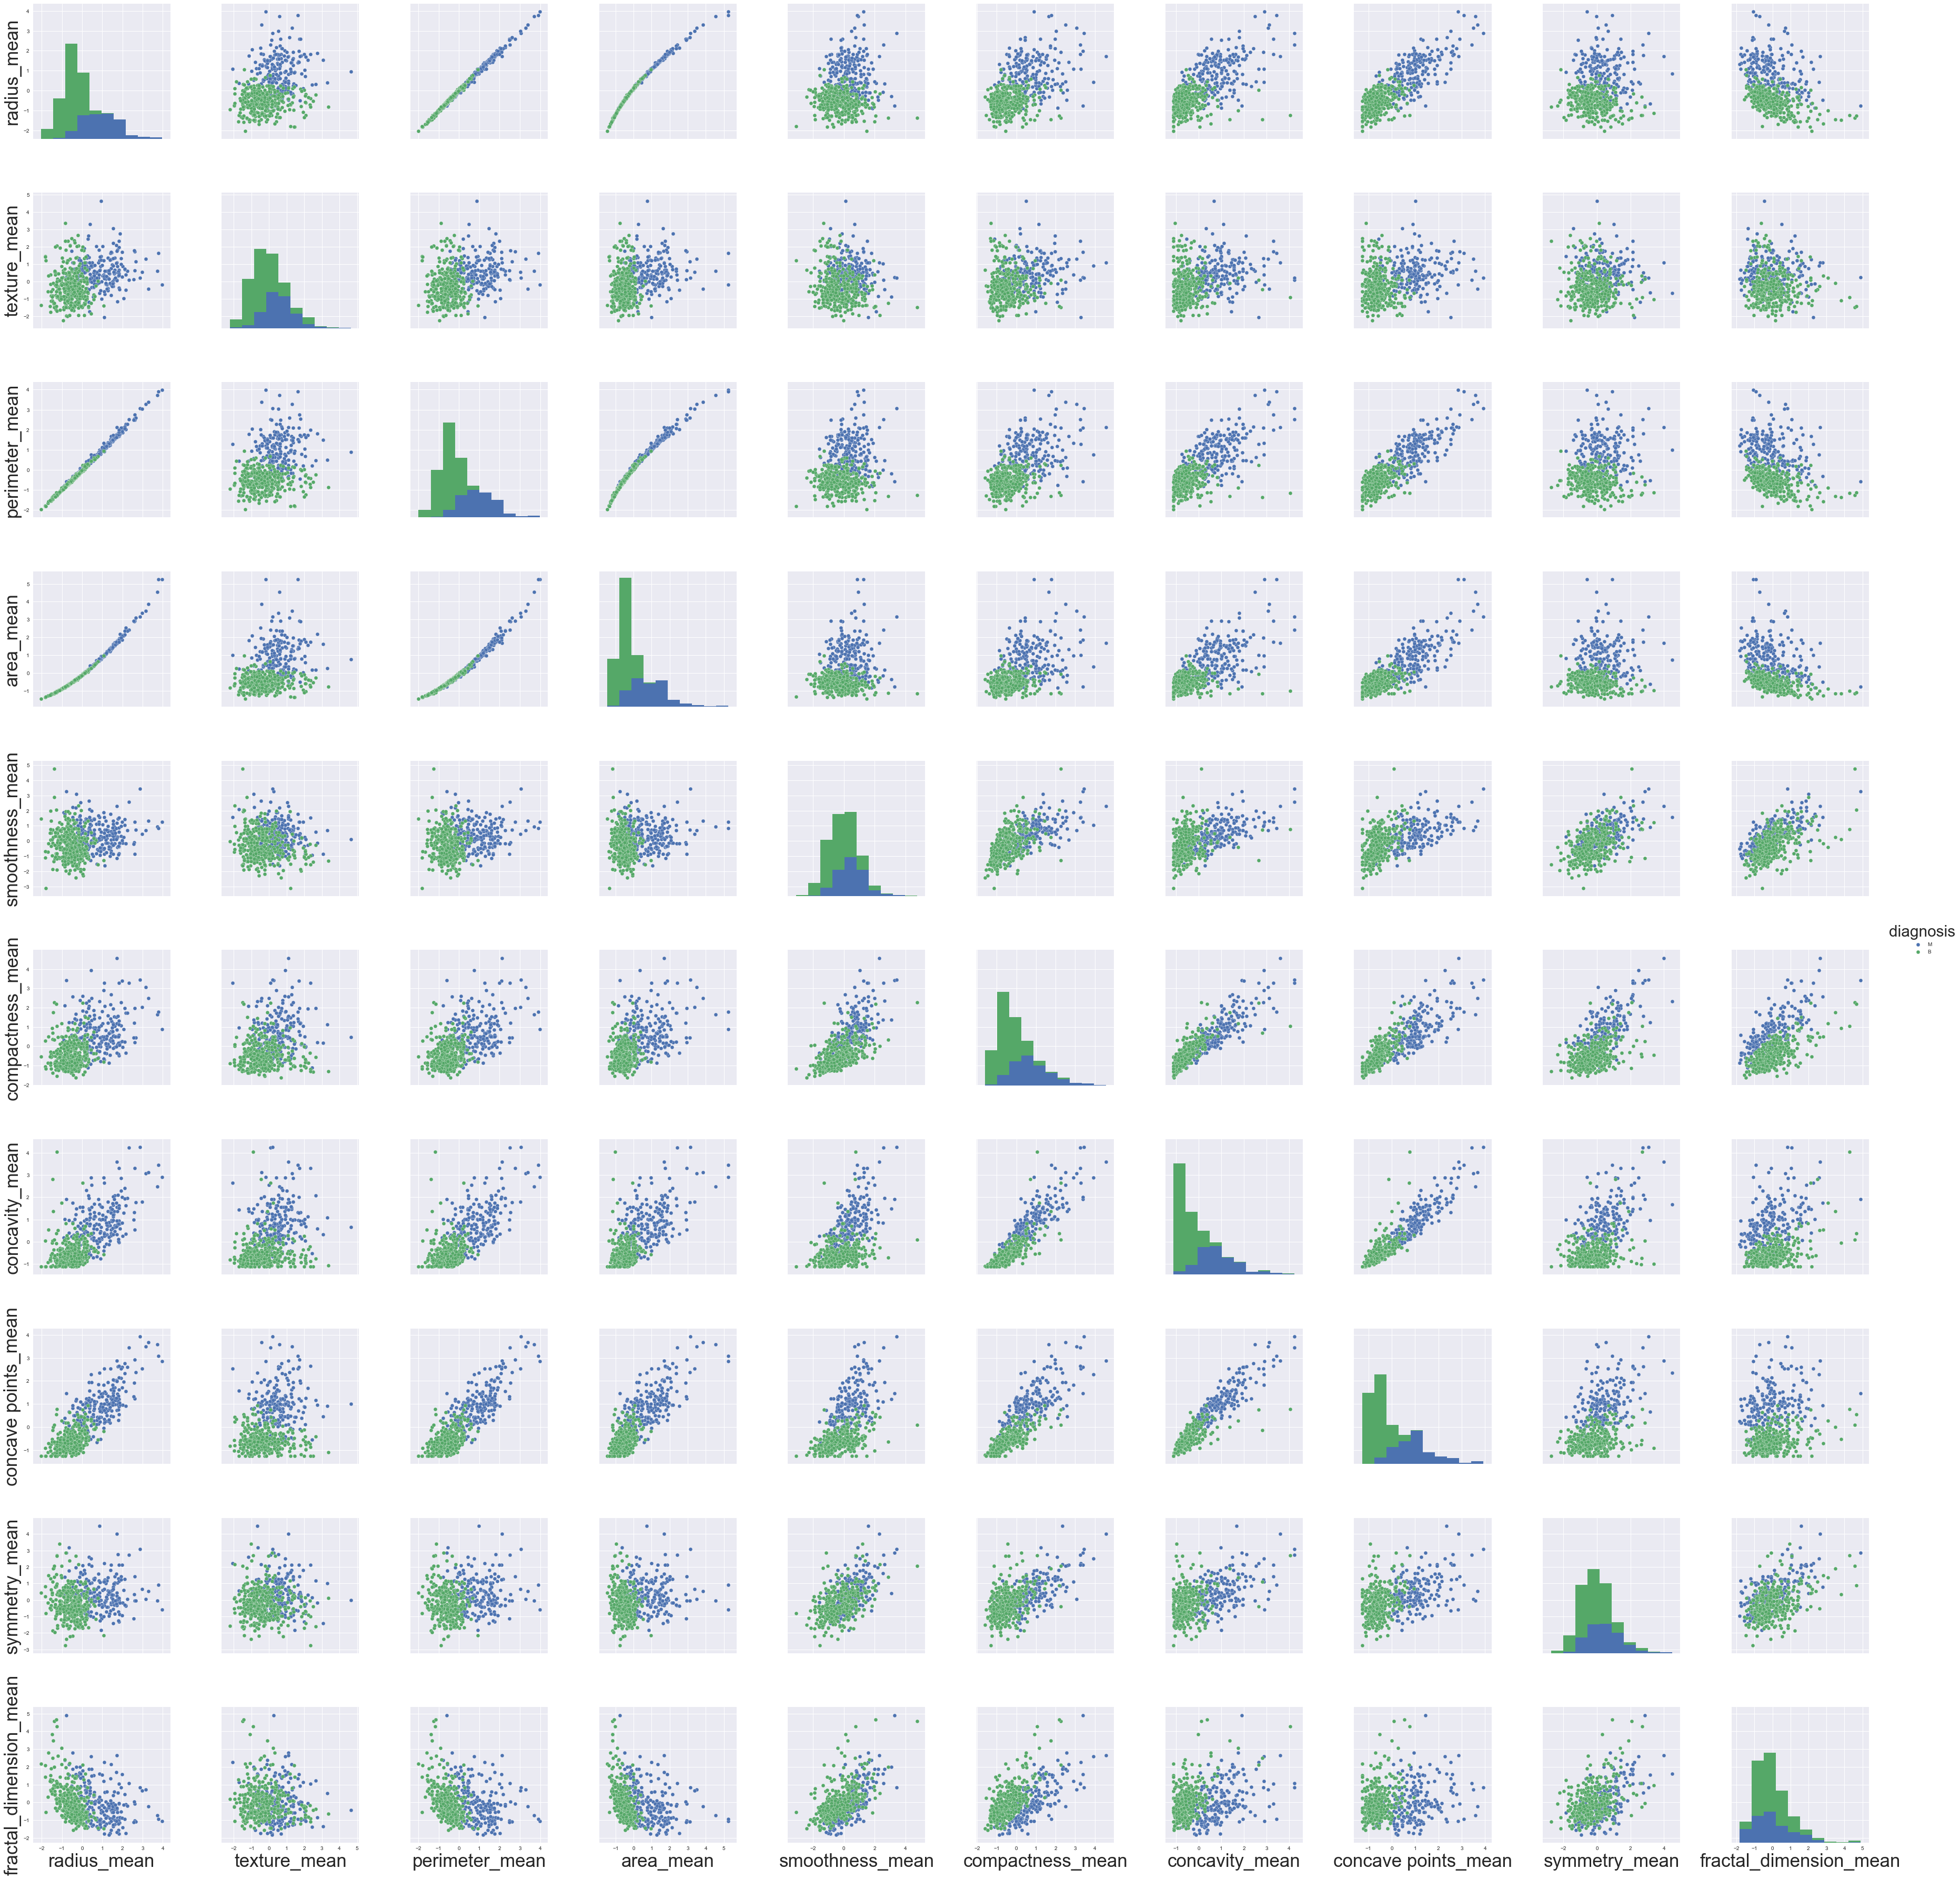

In [146]:
sns.set(rc = {'axes.labelsize': 35})
sns.pairplot(data_m, hue = 'diagnosis', size = 5);

#### SE

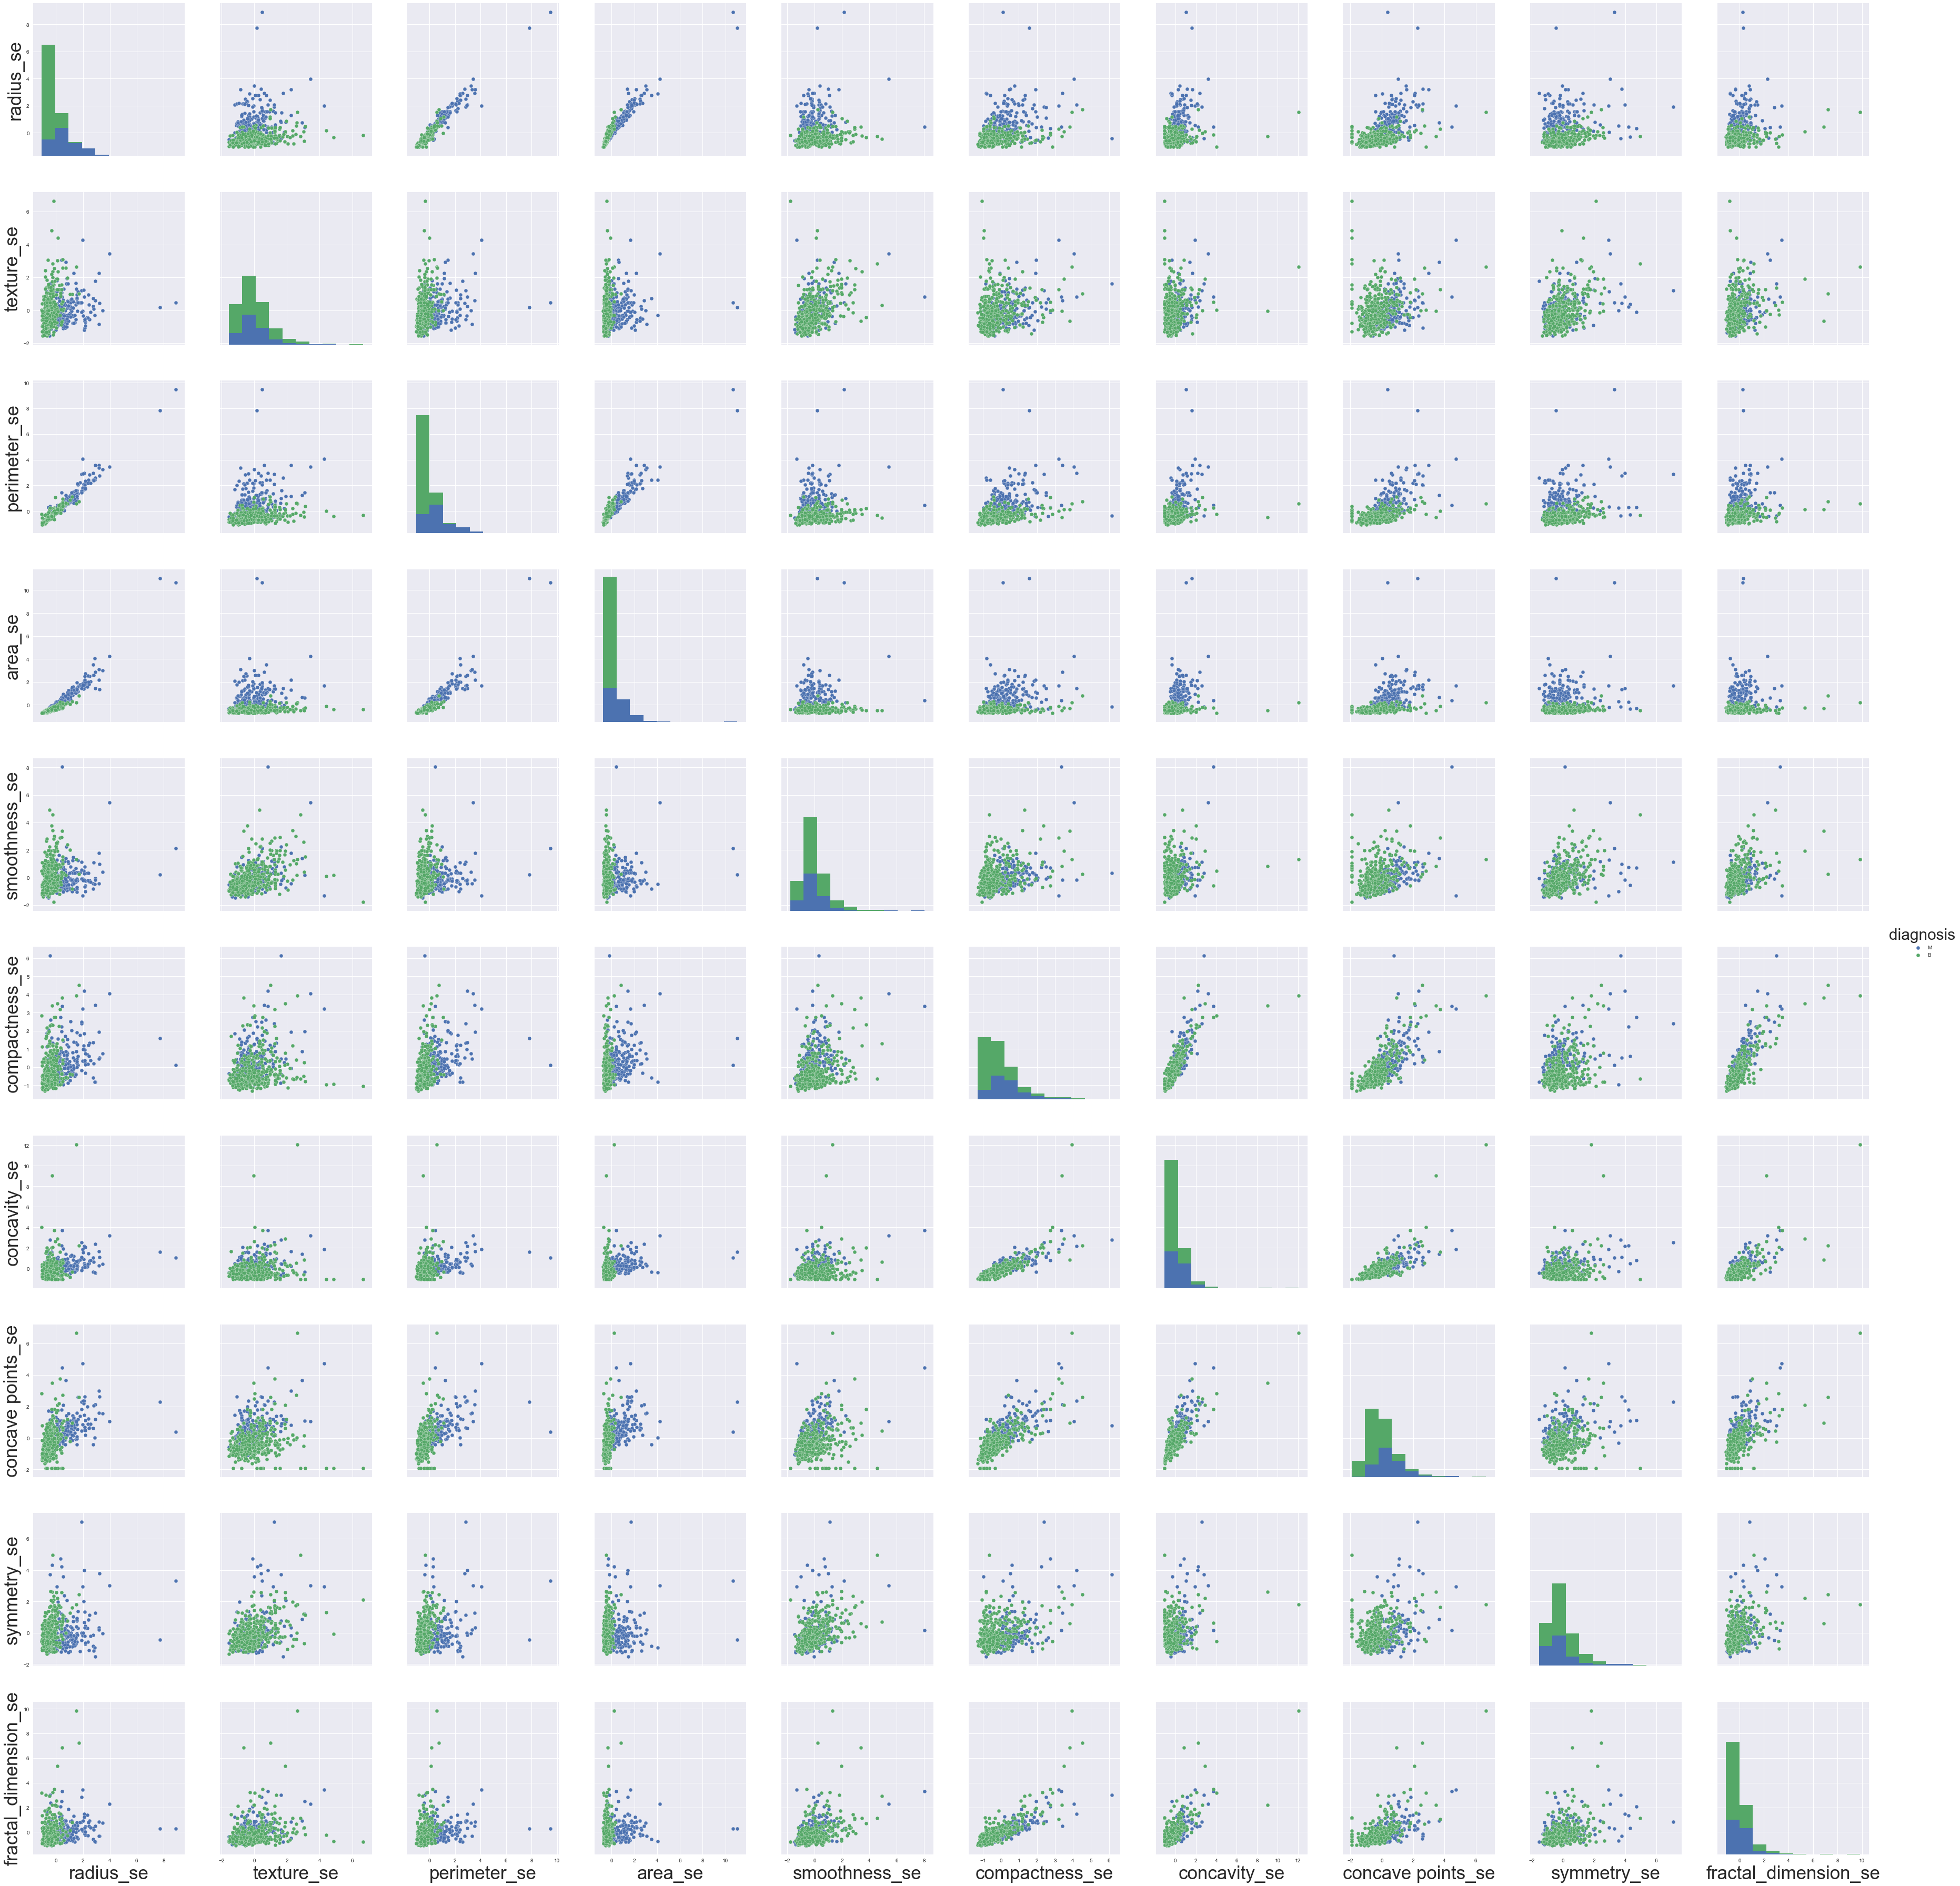

In [77]:
sns.pairplot(data_se, hue = 'diagnosis', size = 5);

#### Worst

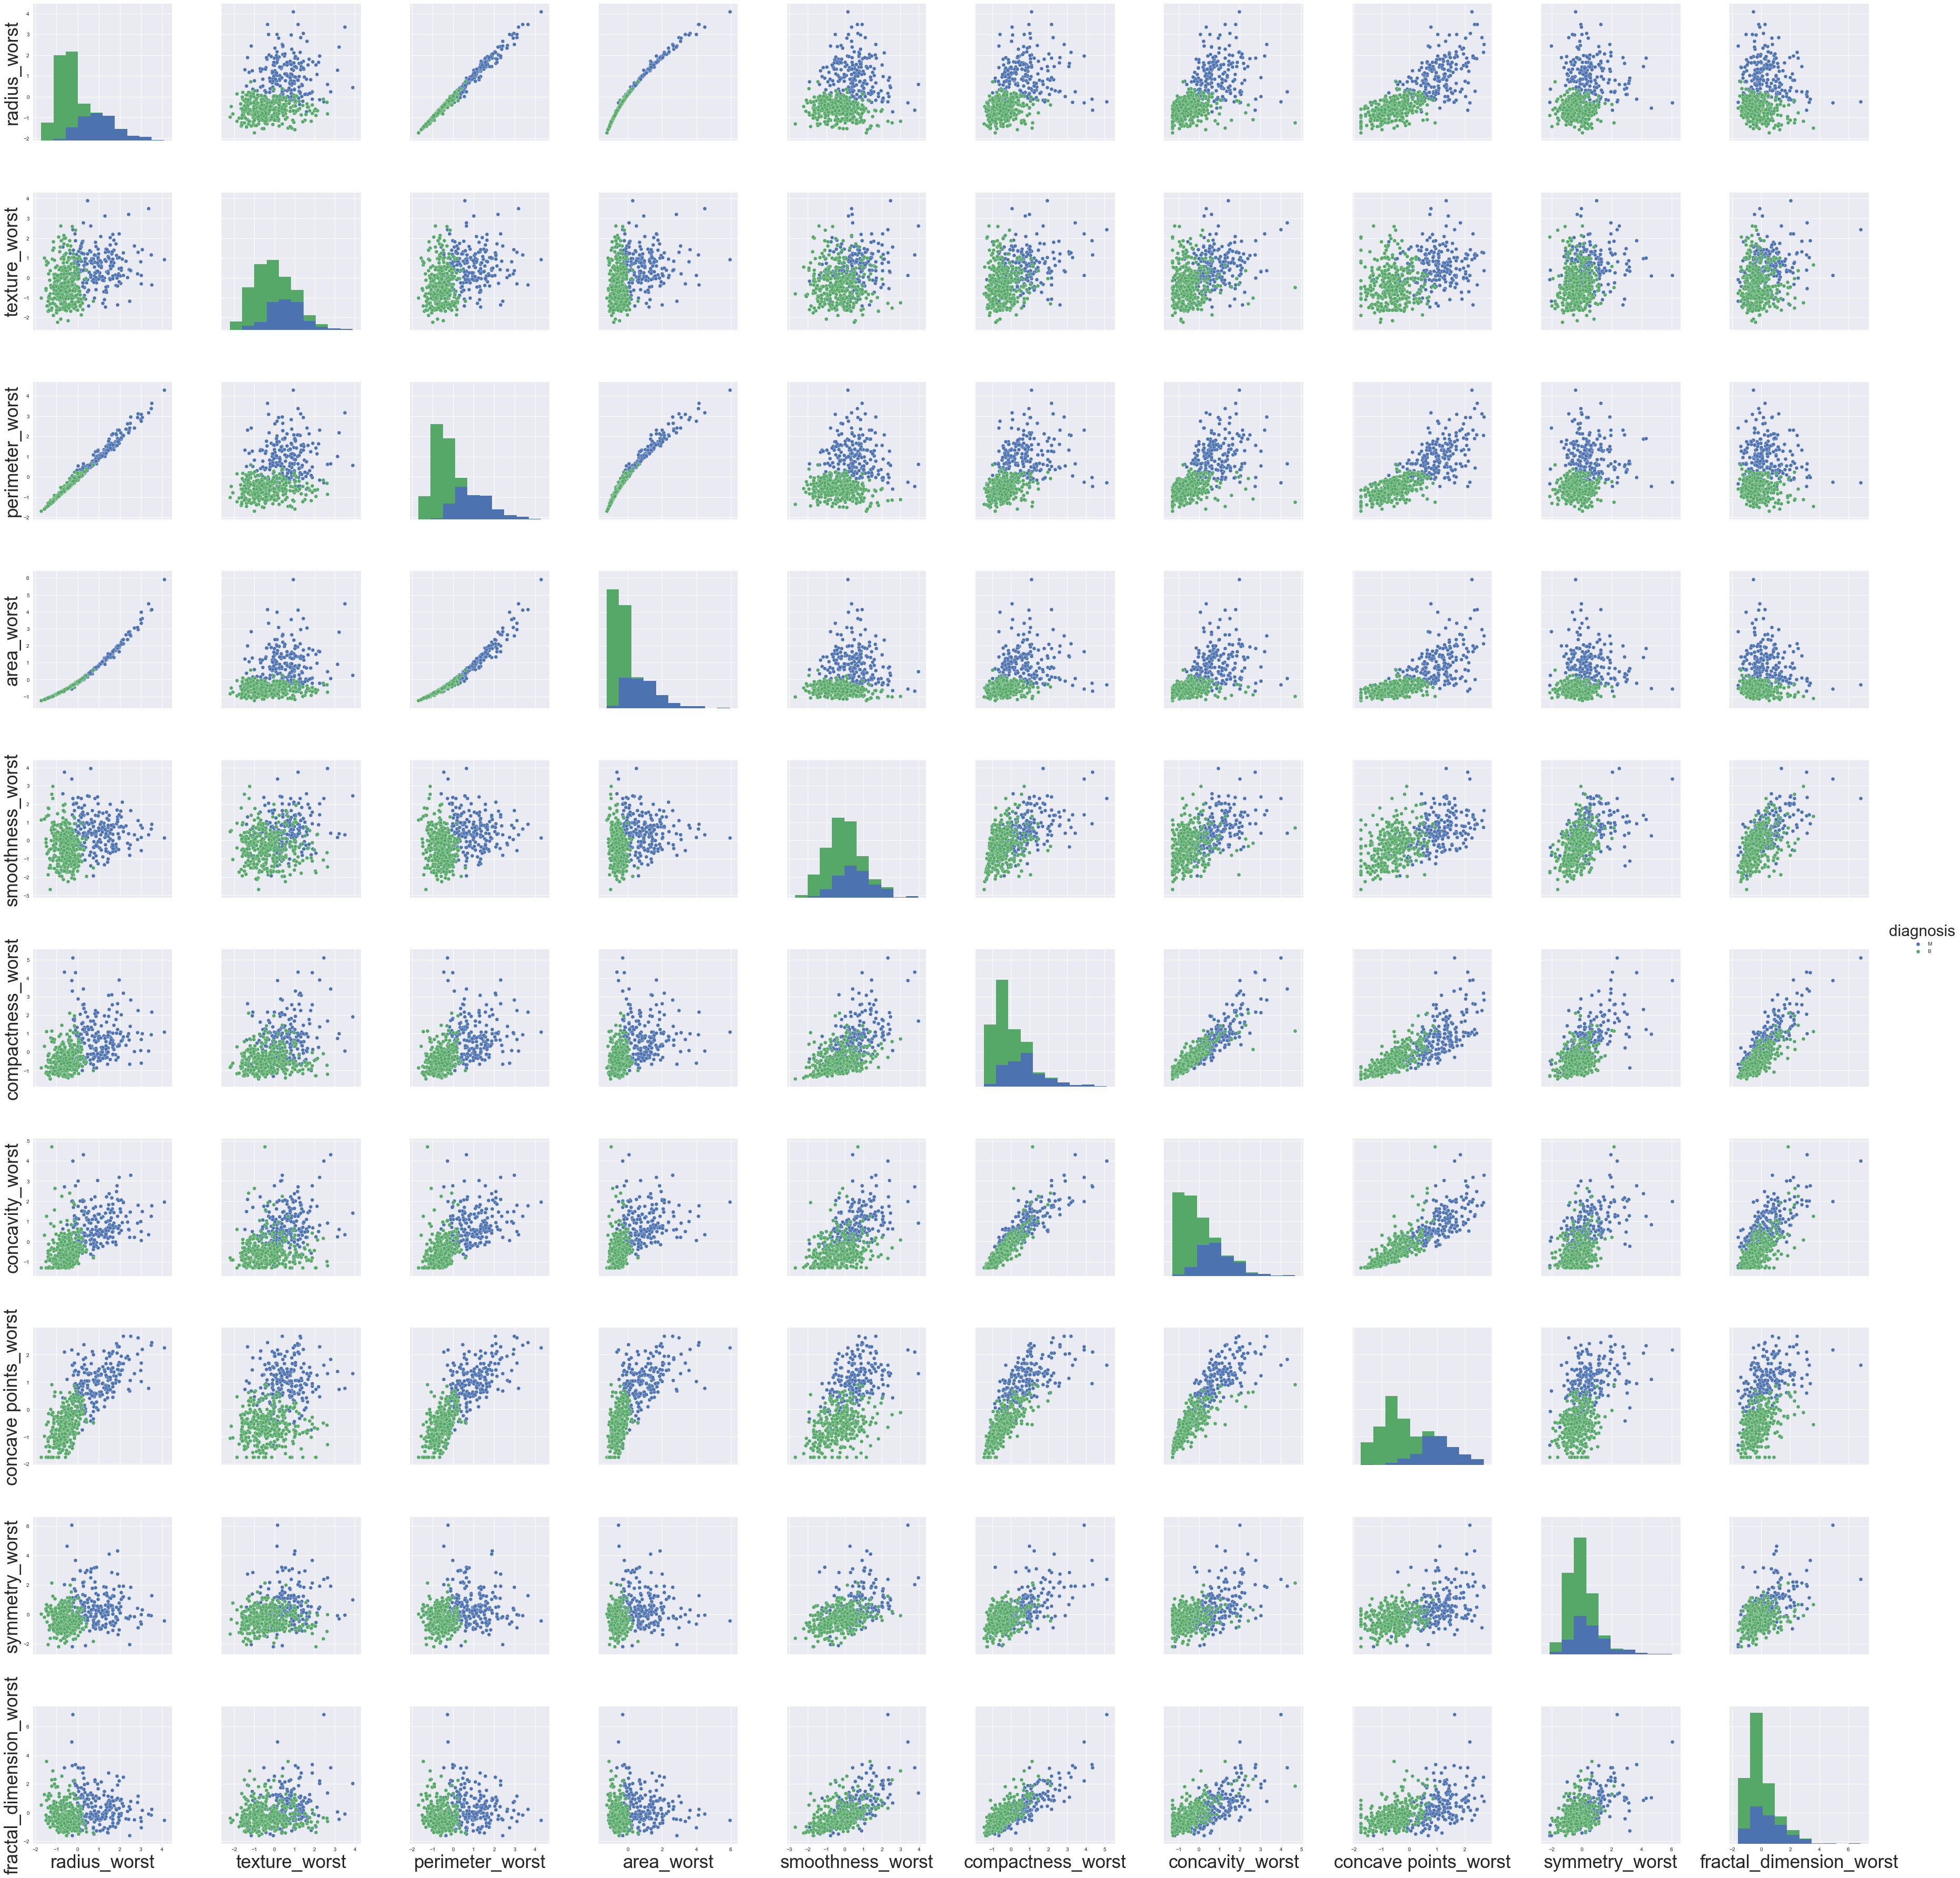

In [78]:
sns.pairplot(data_w, hue = 'diagnosis', size = 5);

### Split Data into Training and Test Set

In [97]:
X = data.drop('diagnosis', axis = 1)
y = data.diagnosis

In [102]:
# binarize y column 
y = y.replace('M',1).replace('B',0)

In [109]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.3,
                                                    shuffle = True,
                                                    random_state = 42)


### Scale Data 

In [110]:
X_train_scaled = pd.DataFrame(stdsc.fit_transform(X_train), 
                              columns = X_train.columns)

X_test_scaled = pd.DataFrame(stdsc.fit_transform(X_test),
                             columns = X_test.columns)

### Testing Different Classifiers

Next I run a quick comparison of different classifiers using sklearn's `cross_val_score` which will separate the data into `k` portions, train the data on `k-1` portions, and test on the remaining portion.  I feed in only the training set (`X_train_scaled` and `y_train`), and set aside the test set for final testing at the end of this notebook. 

I compared the following models: 
   * Logistic Regression:
       * logistic regression is a linear classification model which models the relationship of a categorical dependent variable and independent variable(s) by measuring probabilities of a particular outcome using a logistic function
       * `LogisticRegressionCV` has built-in cross validation for optimizing parameter C and also L2 regularization

       
   * Random Forest: 
        * random forest fits a number of decision trees on subsets of the data and uses averaging to yield a model with improved predictive accuracy and that is less prone to overfitting
        
        
   * SVM: 
       * support vector machines are another type of classification model that has the versatility of learning non-linear boundaries by specifying a kernel
       * given the relatively small training set and the small feature space, I opted to use a Gaussian kernel

In [111]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

clf = {'logisticregression': LogisticRegressionCV(), 
       'randomforest': RandomForestClassifier(),
       'svcgaussian': SVC(kernel = 'rbf')}

# averages cross validation scores across different models 
scores = {}
for key, model in clf.items(): 
    s = cross_val_score(model, 
                        X_train_scaled.values, 
                        y_train, 
                        cv = 4, 
                        scoring = 'accuracy')
    scores[key] = np.mean(s)
    
scores

{'logisticregression': 0.97232223222322234,
 'randomforest': 0.94721972197219717,
 'svcgaussian': 0.97484748474847482}

### Training SVM with Gaussian Kernel

Support Vector Machines are a powerful classification algorithm that enables non-linear decision boundaries through the use of kernels.  Through kernels, SVMs enable non-linear boundaries by transforming data to different dimensionality so that it is linearly separable.  For this classification, I will be using the radial basis function (RBF), which is the Gaussian kernel.  Since the number of training examples is larger than the number of features, and my data is small, SVC with an rbf kernel is a good choice.  

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# Select K best features 
selectK = SelectKBest(f_classif)

# Choose classifier
clf = SVC(kernel = 'rbf', probability = True)

# Set up steps for pipeline
steps = [('feature_selection', selectK), 
         ('SVC', clf)]
pipe = Pipeline(steps)

# Parameter Grid that GridSearchCV will search
parameters = {'feature_selection__k': np.arange(1,30,5), 
              'SVC__C': np.logspace(-3,4, num = 8), # C = [1e-3,..,1e4]
              'SVC__gamma': np.logspace(-3,4, num = 8)} # gamma same as C

cv = GridSearchCV(pipe, param_grid = parameters)

Here I'm doing a grid search to select the best combination of: 
* **Number of features** (and also the features themselves)
* **C**, which controls the tradeoff between classifying points accurately and having a smooth boundary (high C = overfitting) 
* **gamma**, a parameter of the Gaussian kernel that determines the influence of points near or far on decision boundary (high gamma = overfitting)


In [113]:
# Fit model 
cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('feature_selection', SelectKBest(k=10, score_func=<function f_classif at 0x000001EA588172F0>)), ('SVC', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'feature_selection__k': array([ 1,  6, 11, 16, 21, 26]), 'SVC__C': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03,   1.00000e+04]), 'SVC__gamma': array([  1.00000e-03,   1.00000e-02,   1.00000e-01,   1.00000e+00,
         1.00000e+01,   1.00000e+02,   1.00000e+03,   1.00000e+04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [114]:
y_predict = cv.predict(X_test_scaled)

In [115]:
# Best hyperparameters for model 
cv.best_params_

{'SVC__C': 10.0, 'SVC__gamma': 0.01, 'feature_selection__k': 21}

These are the features that SelectKBest found had most predictive power! Just as our plots showed, most of the `mean` and `worst` features were better at separating the two classes.  

In [144]:
mask = list(cv.best_estimator_.named_steps.feature_selection.get_support())
selected_features = X.columns[mask]
list(selected_features)

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'radius_se',
 'perimeter_se',
 'area_se',
 'concave points_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst']

### Performance Metrics

#### Accuracy

In [117]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Accuracy Score
accuracy_score(y_test, y_predict) 

0.98830409356725146

#### Confusion Matrix

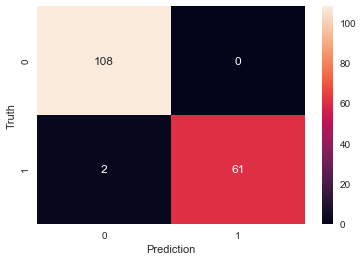

In [129]:
ax = plt.axes() 
sns.set(rc = {})

# Confusion Matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot = True, fmt = 'd'); 
ax.set(xlabel = 'Prediction', ylabel = 'Truth');

#### Additional Metrics (Precision, Recall, F1, ROC-AUC)

In [130]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score


score_df = pd.DataFrame({'accuracy': accuracy_score(y_test, y_predict),
                         'precision': precision_score(y_test, y_predict), 
                         'recall': recall_score(y_test, y_predict), 
                         'f1': f1_score(y_test, y_predict), 
                         'auc': roc_auc_score(y_test, y_predict)}, 
                        index = pd.Index([0]))

print(score_df) 

   accuracy       auc        f1  precision    recall
0  0.988304  0.984127  0.983871        1.0  0.968254


#### ROC-AUC and Precision-Recall Curves

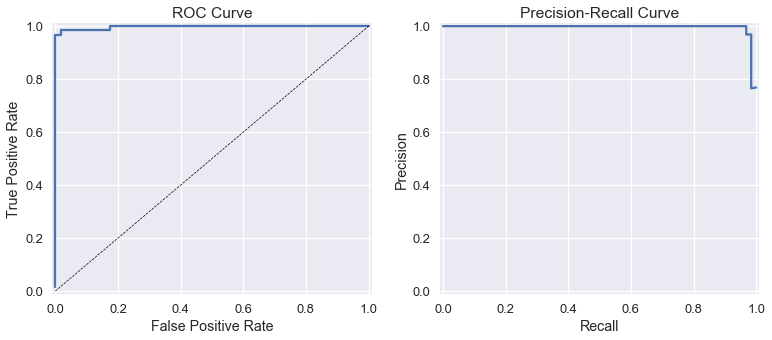

In [142]:
from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix 

sns.set_context('talk')

# Get the probabilities for each of the two categories 
y_prob = cv.predict_proba(X_test_scaled)

# Plot the ROC-AUC curve 
fig, axList = plt.subplots(ncols = 2) 
fig.set_size_inches(11,5)
ax = axList[0]

fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
ax.plot(fpr, tpr)

# Random guess line 
ax.plot([0,1], [0,1], ls = '--', color = 'black', lw = 0.7)
ax.set(xlabel = 'False Positive Rate', ylabel = 'True Positive Rate', 
       xlim = [-0.01, 1.01], ylim = [-0.01, 1.01], 
       title = 'ROC Curve')
ax.grid(True)

# Plot the precision-recall curve 
ax = axList[1]

precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
ax.plot(recall, precision)
ax.set(xlabel = 'Recall', ylabel = 'Precision', 
       xlim = [-0.01, 1.01], ylim = [-0.01, 1.01], 
       title = 'Precision-Recall Curve')

ax.grid(True)
plt.tight_layout()